Uncertainty Coefficient: [0.         0.08079314 0.         0.         0.08079314 0.08079314
 0.08079314 0.         0.         0.         0.         0.99277445
 0.         0.         0.24229219 0.         0.         0.36592365
 0.08079314 0.         0.08079314 0.         0.         0.
 0.         0.         0.         0.         0.14144054 0.
 0.36592365 0.         0.         0.93406806 0.24229219 0.
 0.36644626 0.08079314 0.         0.43646982 0.         0.58423881
 0.         0.         0.        ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
87                 6.3              

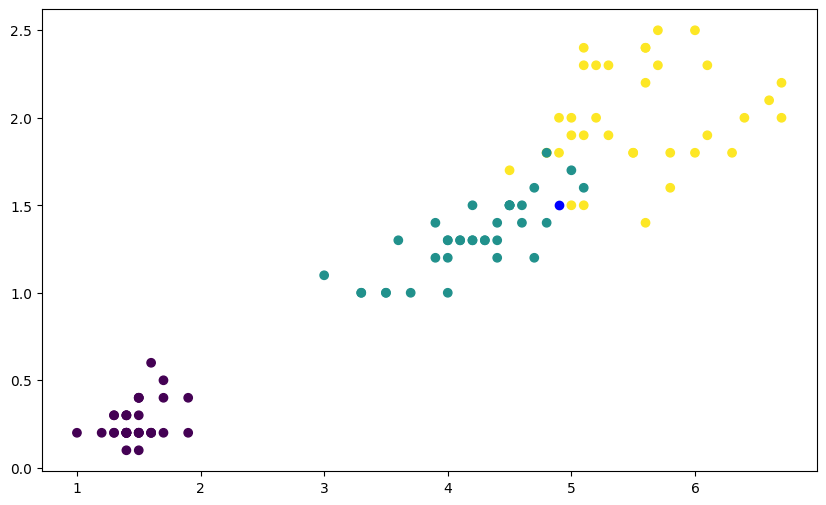

Variable Importance Plot - Global Interpretation


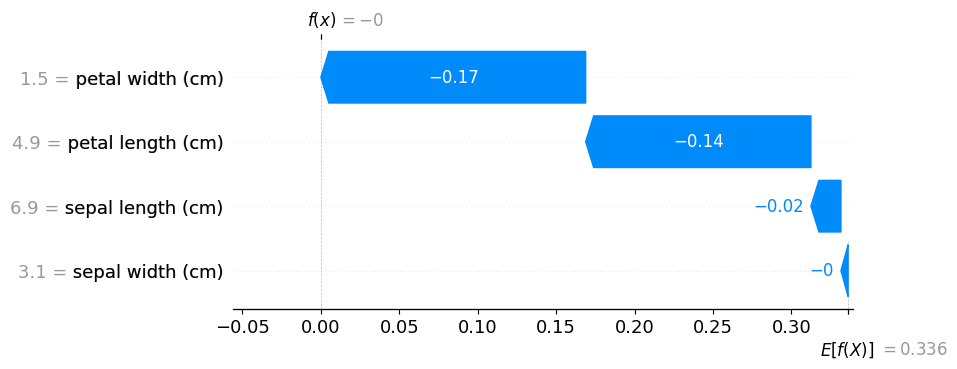

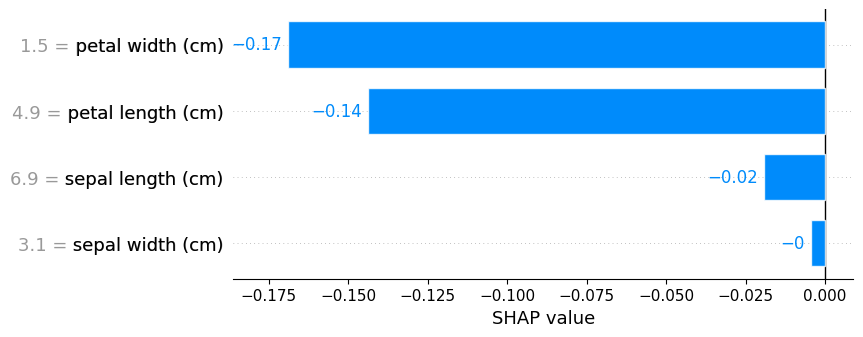

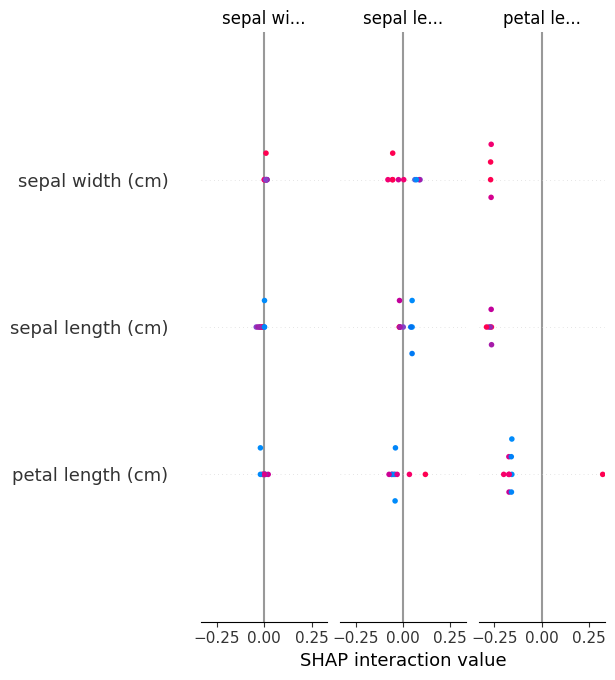

/home/chenruizhu/XAI-UQ/myvenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

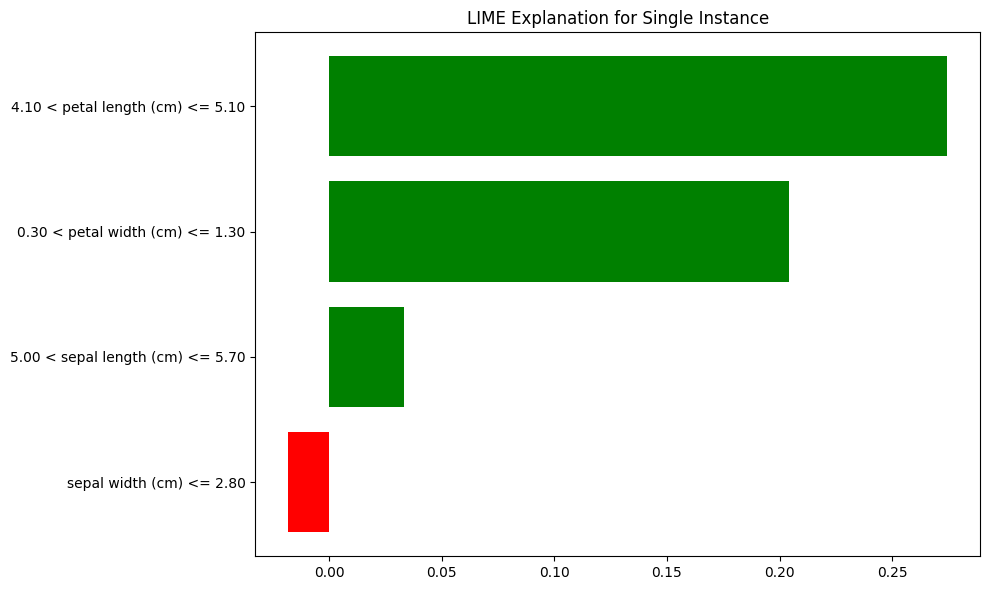

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from scipy.stats import entropy

def explain_with_shap():
    X,y = shap.datasets.iris()
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                        stratify =y,
                                                        random_state = 13)

    rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    y_pred_proba = rf_clf.predict_proba(X_test)
    uc = entropy(y_pred_proba, axis=1, base=2)
    print(f"Uncertainty Coefficient: {uc}")
    # print(y_pred_proba)
    print(classification_report(y_pred, y_test))

    # Create SHAP explainer
    explainer = shap.TreeExplainer(rf_clf)
    shap_values = explainer(X_test)

    explanation_instance = shap_values[11,::,0]

    print(X_train)
    plt.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train)
    plt.scatter(X_test["petal length (cm)"].iloc[11], X_test["petal width (cm)"].iloc[11], c='blue')

    plt.show()
    print("Variable Importance Plot - Global Interpretation")
    plt.figure()
    shap.plots.waterfall(explanation_instance)
    shap.plots.force(explanation_instance)
    shap.plots.bar(explanation_instance)
    shap.summary_plot(shap_values[:10], X_test[:10], feature_names=X_test[:10].columns)
    plt.show()

def explain_with_lime():
    """
    Implement and visualize LIME explanations for Iris dataset
    """
    X, y = shap.datasets.iris()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    
    model = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)
    model.fit(X_train, y_train)

    # Create LIME explainer
    feature_names = ['sepal length (cm)', 'sepal width (cm)', 
                    'petal length (cm)', 'petal width (cm)']
    class_names = ['setosa', 'versicolor', 'virginica']
    
    explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=feature_names,
        class_names=class_names,
        mode='classification',
        random_state=13
    )
    
    # Generate explanation for a single instance
    instance_idx = 0
    exp = explainer.explain_instance(
        X_test.iloc[instance_idx].values, 
        model.predict_proba,
        num_features=len(feature_names)
    )
    
    # Visualize LIME explanation
    plt.figure()
    exp.as_pyplot_figure()
    plt.title("LIME Explanation for Single Instance")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plt.rcParams["figure.figsize"] = (10, 6) 
    explain_with_shap()
    explain_with_lime()